# Genetic Algorithm on routing problem

This is an exercise on udemy's optimization course. As many of the routing problems the objetive (called 'fitness' function on GA) is to minimize

https://www.udemy.com/course/optimization-with-python-linear-nonlinear-and-cplex-gurobi/learn/lecture/29061700#overview

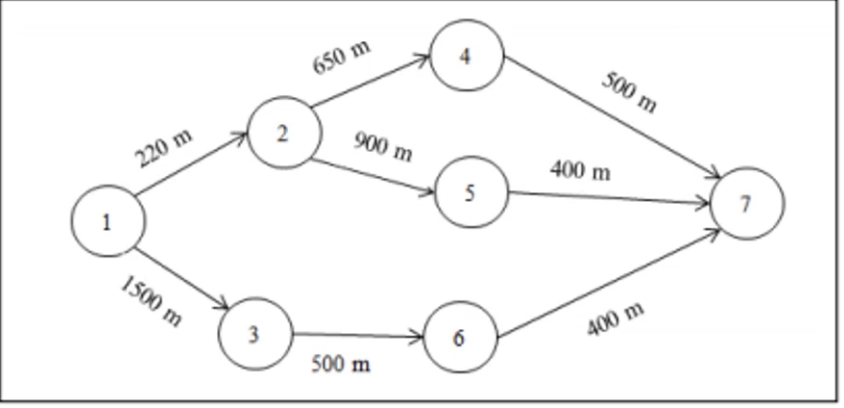

In [26]:
#Starting libraries 
import numpy as np, pandas as pd
from geneticalgorithm import geneticalgorithm as ga

## It has to pass from 1 to (2 or 3) to (4 or 5 or 6) to 7 

To generate the path we have to balance the inputs and outputs, and also constrain the inputs and outputs

So eight variables (lines) 
The matematical model where: 

d= Destination Cost
xij= Node X from i to j 

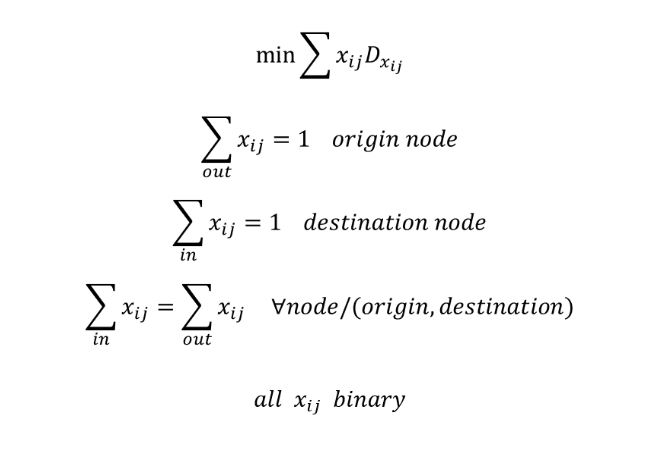

In [27]:
#Creation of DFs

#for nodes' classification
nodes=pd.DataFrame({'node':range(1,8),
                    'descr': ['origin','node','node',
                                'node','node','node','destination']})

#contains the routes and constraints
paths=pd.DataFrame({'from':[1,1,2,2,4,5,3,6],
                   'to':[2,3,4,5,7,7,6,7],
                  'cost':[220, 1500, 650, 900, 500, 400, 500, 400]
                   })
n_vars=paths.shape[0]
paths

,from,to,cost
0,1,2,220
1,1,3,1500
2,2,4,650
3,2,5,900
4,4,7,500
5,5,7,400
6,3,6,500
7,6,7,400


In [28]:
#fitness(objective) Definition


def f(x):
    pen = 0
    
    #penalizing that the breeds dont select a correct origin
    #The constraints are built on a scalable level, 
    #if we have diff entries it would work
    node_og= int(nodes.node[nodes.descr=='origin'])
    if sum([x[p] for p in paths.index[paths['from']==node_og]]) !=1: 
        pen+=1000000 *np.abs(sum([x[p]for p in \
                                 paths.index[paths['from']==node_og]])-1)
        
    #penalizing breeds-routes that are not finished (similar to above)
    node_out= int(nodes.node[nodes.descr=='destination'])
    if sum([x[p] for p in paths.index[paths['to']==node_out]]) !=1: 
        pen+=1000000 *np.abs(sum([x[p]for p in \
                                 paths.index[paths['to']==node_out]])-1)
    
    #balancing constraint
    for each in nodes.node[nodes.descr=='node']:
        sum_in= sum([x[p] for p in paths.index[paths['to']==each]])
        sum_out= sum([x[p] for p in paths.index[paths['from']==each]])
        if sum_in!=sum_out:
            pen += 1000000 * np.abs(sum_in-sum_out)
    
        #By default, GA minimizes so its okay to use the function here
    return sum([x[p]*paths.cost[p] for p in paths.index])+pen


In [29]:
#config
varbounds = np.array([[0,1]]*n_vars)
vartype = np.array([['int']]*n_vars)

algorithm_param = {'max_num_iteration': 500,\
                   'population_size':100,\
                   'mutation_probability':0.35,\
                   'elit_ratio': 0.1,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':100}

 The best solution found:                                                                           
 [1. 0. 1. 0. 1. 0. 0. 0.]

 Objective function:
 1370.0


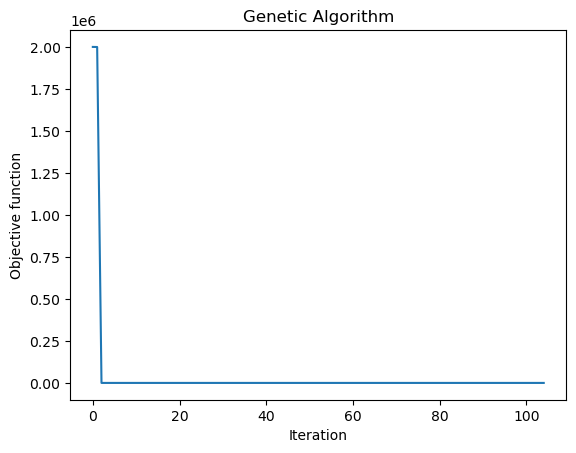

In [30]:
#Model
model = ga(function=f,dimension=n_vars,variable_type_mixed=vartype,
           variable_boundaries=varbounds,
           algorithm_parameters=algorithm_param)

model.run()


In [37]:
#print
x = model.best_variable
objFun = model.best_function
paths['activated'] = 0
for p in paths.index:
    paths.activated[p] = x[p]
print('\n\nAll Paths:')
print(paths)

print('\nSelected Paths:')
print(paths[paths.activated==1])

print('\nTotal path cost:', objFun)



All Paths:
   from  to  cost  activated
0     1   2   220          1
1     1   3  1500          0
2     2   4   650          1
3     2   5   900          0
4     4   7   500          1
5     5   7   400          0
6     3   6   500          0
7     6   7   400          0

Selected Paths:
   from  to  cost  activated
0     1   2   220          1
2     2   4   650          1
4     4   7   500          1

Total path cost: 1370.0
